# Rede neural para classificar se uma pessoa possui doença cardíaca 
Foi utilizado este dataset https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
# Importing libs
import pandas as pd
import numpy as np
import keras
from keras.metrics import *
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

In [2]:
# Reading data from csv
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Dividindo os dados entre treino e teste
80% parq treino e 20% para teste

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:13], data.iloc[:,13], test_size = 0.2, shuffle = True, stratify = data['target'])

In [9]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3


In [311]:
y_train

262    0
125    1
126    1
120    1
116    1
      ..
271    0
29     1
150    1
191    0
46     1
Name: target, Length: 242, dtype: int64

In [35]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1


In [13]:
y_test

122    1
173    0
170    0
258    0
10     1
      ..
209    0
66     1
11     1
297    0
27     1
Name: target, Length: 61, dtype: int64

## Preparando os dados para serem usados
Normalização das colunas

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [36]:
train = x_train.iloc[:,:].values.astype(float)

In [37]:
test = x_test.iloc[:,:].values.astype(float)

In [38]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [39]:
x_train_normalized = pd.DataFrame(train_scaled,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])
x_test_normalized = pd.DataFrame(test_scaled,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [40]:
x_train_normalized

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.500000,1.0,0.000000,0.273585,0.356164,0.0,0.5,0.183206,1.0,0.322581,0.5,0.50,1.000000
1,0.104167,0.0,0.333333,0.226415,0.191781,0.0,0.5,0.923664,0.0,0.112903,1.0,0.00,0.666667
2,0.375000,1.0,0.000000,0.169811,0.178082,0.0,0.5,0.549618,0.0,0.016129,1.0,0.00,0.666667
3,0.729167,0.0,0.000000,0.339623,0.404110,0.0,0.5,0.389313,0.0,0.322581,0.5,0.50,0.666667
4,0.250000,1.0,0.666667,0.339623,0.200913,0.0,0.0,0.740458,0.0,0.322581,0.5,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.666667,1.0,1.000000,0.377358,0.246575,0.0,0.5,0.564885,0.0,0.419355,0.5,0.50,0.666667
238,0.500000,1.0,0.666667,0.339623,0.162100,1.0,0.0,0.618321,0.0,0.193548,0.0,0.00,0.666667
239,0.770833,1.0,0.000000,0.622642,0.232877,0.0,0.0,0.511450,0.0,0.370968,1.0,0.00,0.333333
240,0.604167,1.0,0.000000,0.320755,0.205479,0.0,0.0,0.458015,1.0,0.354839,0.5,0.75,1.000000


In [41]:
x_test_normalized

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.181818,0.0,0.666667,0.209302,0.492806,0.0,0.0,0.845361,1.0,0.000000,1.0,0.00,0.666667
1,0.696970,1.0,0.666667,0.441860,0.334532,0.0,0.0,0.855670,0.0,0.571429,1.0,0.50,1.000000
2,0.636364,1.0,0.666667,0.418605,0.449640,1.0,0.0,0.536082,1.0,0.107143,0.5,0.25,0.333333
3,0.818182,0.0,0.000000,0.651163,0.406475,0.0,1.0,0.659794,1.0,0.250000,0.5,0.00,0.666667
4,0.575758,1.0,0.000000,0.534884,0.388489,0.0,1.0,0.721649,0.0,0.214286,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.727273,1.0,0.000000,0.534884,0.165468,0.0,1.0,0.742268,1.0,0.000000,1.0,0.25,1.000000
57,0.484848,1.0,0.666667,0.069767,0.327338,0.0,1.0,0.546392,1.0,0.214286,0.5,0.00,0.666667
58,0.393939,0.0,0.666667,0.418605,0.517986,0.0,1.0,0.505155,0.0,0.035714,1.0,0.00,0.666667
59,0.727273,1.0,0.000000,0.813953,0.161871,1.0,0.0,0.000000,0.0,0.178571,0.5,0.50,0.333333


## Criando o modelo

In [356]:
model1 = Sequential()

In [357]:
model1.add(Dense(1000, activation='relu', input_shape=(13,)))
model1.add(Dropout(0.90))
model1.add(Dense(1, activation='sigmoid'))

In [358]:
model1.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate = 0.01),
               metrics=['accuracy'])

## Treinando o modelo
Usou-se batch gradient descent junto com early stopping

In [359]:
batch_size = 242
epochs = 100
history = model1.fit(
    x_normalized, y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(x_test_normalized, y_test),
    shuffle = True,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=50,min_delta=0.01)])

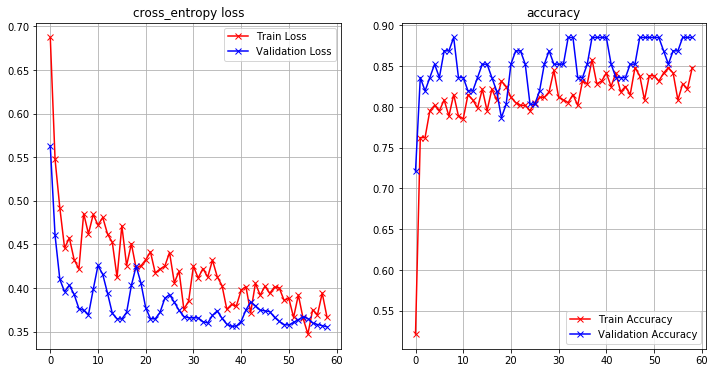

In [360]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

## Avaliando o classificador

In [361]:
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

predictions = []

for index, row in x_test_normalized.iterrows():
    real = (y_test.iloc[index])
    predicted = int(np.around(model1.predict(np.array(row.values).reshape(1,13)))[0][0])
    predictions.append(predicted)
    
    # true positives
    if real==1 and predicted==1:
        true_positives += 1
    
    # false positives
    if real==0 and predicted==1:
        false_positives += 1
    
    # true negatives
    if real==0 and predicted==0:
        true_negatives += 1
        
    # false negatives
    if real==1 and predicted==0:
        false_negatives += 1
        
total = true_positives + true_negatives + false_positives + false_negatives
acertos = true_negatives + true_positives
predictions = np.array(predictions)

### Acurácia e taxa de erro
Total de 61 casos de teste

In [362]:
print('Total de testes:',total)
print('Acurácia:',acertos/total)
print('Taxa de erro:',(total-acertos)/total)

Total de testes: 61
Acurácia: 0.8852459016393442
Taxa de erro: 0.11475409836065574


In [363]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve

### Matriz de confusão

In [364]:
confusion_matrix(y_test,predictions)

array([[23,  5],
       [ 2, 31]])

### Precision e Recall

In [365]:
print('Precision:',precision_score(y_test,predictions))
print('Recall:',recall_score(y_test,predictions))

Precision: 0.8611111111111112
Recall: 0.9393939393939394


### AUC-ROC

In [366]:
roc_auc_score(y_test,predictions)

0.8804112554112554

### Curva ROC

In [367]:
fpr, tpr, _ = roc_curve(y_test,predictions)

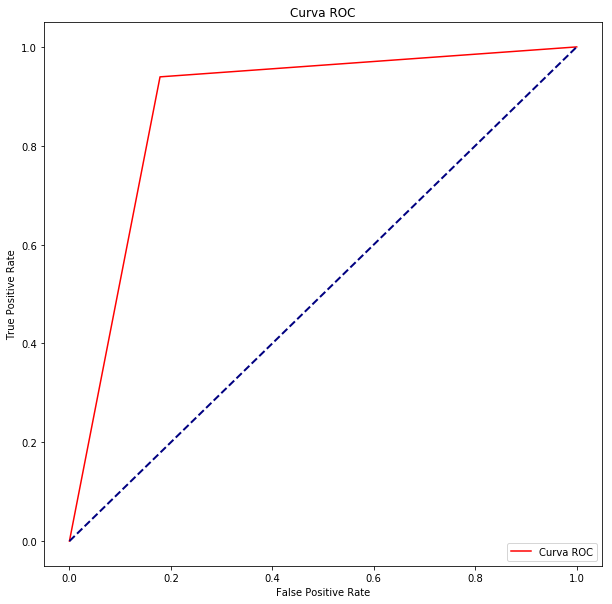

In [368]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, color='red', label='Curva ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")